In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflow<3,>=2.9.0, but you have tensorflow 2.6.4 which is incompatible.
pandas-profiling 3.1.0 requires mar

In [2]:
from fastai.vision.all import *

In [3]:
# download images of thousands of images of cat and dog breeds from Oxford-IIIT dataset.
path = untar_data(URLs.PETS)/'images'      

def is_cat(x) : 
    return x[0].isupper()
#data block
dls = ImageDataLoaders.from_name_func(path,get_image_files(path), valid_pct=0.2,seed=31,label_func=is_cat,item_tfms=Resize(224))

learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)





Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.143073,0.019047,0.006766,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.065417,0.018894,0.007442,00:57


In [4]:

uploader = SimpleNamespace(data=['../input/cat-dog-verification/dog1.jpeg'])


In [5]:
img = PILImage.create(uploader.data[0])
is_cat_,_,prob = learn.predict(img)
print(f'Is this a cat? : {is_cat_}.')
print(f'Probabillty it is a cat : {prob}.')
#Almost always works like a charm - for both dog and cat sample images

Is this a cat? : False.
Probabillty it is a cat : TensorBase([1.0000e+00, 1.3367e-07]).


In [6]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/"images"),label_func=lambda o : path/'labels'/f'{o.stem}_P{o.suffix}',codes=np.loadtxt(path/'codes.txt',dtype=str))
learn=unet_learner(dls,resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.869996,7.839064,00:01


epoch,train_loss,valid_loss,time
0,2.643035,2.220983,00:01
1,2.142805,1.516798,00:01
2,1.820667,1.325892,00:01
3,1.585799,1.130160,00:01
4,1.395932,0.976902,00:01
5,1.231890,0.920392,00:01
6,1.105919,0.876924,00:01
7,1.008466,0.869866,00:01


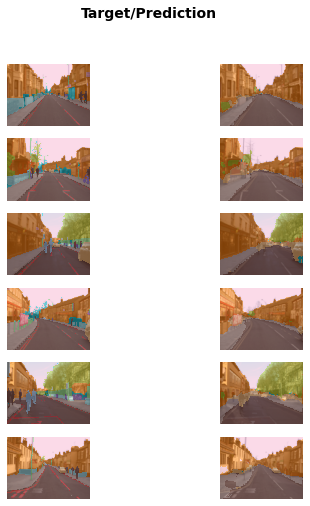

In [7]:
learn.show_results(max_n=6,figsize=(7,8))

In [8]:
# DL for NLP
# Movie sentiment analysis

from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid='test')
learn=text_classifier_learner(dls,AWD_LSTM,drop_mult=0.5,metrics=accuracy)
learn.fine_tune(4,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.461279,0.385340,0.826760,02:18


epoch,train_loss,valid_loss,accuracy,time
0,0.307771,0.330252,0.861760,04:15
1,0.246393,0.196772,0.923280,04:15
2,0.190545,0.199785,0.922600,04:17
3,0.146807,0.191852,0.928720,04:16


In [9]:
learn.predict("Boring and too long.")

('neg', tensor(0), tensor([0.9871, 0.0129]))

In [10]:
#Tabular data - csv file, database where one column is to be predicted given other column data

from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls=TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names="salary",
                               cat_names=['workclass','education', 'marital-status', 'occupation',
                 'relationship', 'race'],
                               cont_names=['age', 'fnlwgt', 'education-num'],
                               procs = [Categorify, FillMissing, Normalize])
learn  = tabular_learner(dls,metrics=accuracy)




In [11]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.383699,0.363612,0.834152,00:04
1,0.369691,0.357035,0.841063,00:03
2,0.353238,0.348857,0.841370,00:04


In [12]:
from fastai.collab import *
path=untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn=collab_learner(dls,y_range=(0.5,5.5))
learn.fine_tune(8)


epoch,train_loss,valid_loss,time
0,1.510690,1.430921,00:00


epoch,train_loss,valid_loss,time
0,1.364665,1.362985,00:00
1,1.240869,1.123321,00:00
2,0.963877,0.820121,00:00
3,0.775075,0.714231,00:00
4,0.688095,0.687468,00:00
5,0.654845,0.679617,00:00
6,0.640539,0.677293,00:00
7,0.626594,0.676850,00:00


In [13]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,9.0,24.0,2.5,3.165416
1,59.0,94.0,4.0,3.754431
2,75.0,56.0,5.0,4.239537
3,1.0,20.0,1.0,3.660685
4,95.0,2.0,4.0,3.330977
5,44.0,91.0,4.0,3.998292
6,37.0,28.0,4.0,3.421735
7,39.0,31.0,3.5,3.927127
8,59.0,10.0,1.0,2.609042


In [14]:
!pip install -Uqq duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
ray 2.0.0 requires click<=8.0.4,>=7.0, but you have click 8.1.3 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.


In [15]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term,max_images=30):
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [16]:
# model used in lecture - is it a bird or not??
urls = search_images('bird photos',max_images=1)
urls[0]

'https://amazinganimalphotos.com/wp-content/uploads/2016/11/beautiful-birds.jpeg'

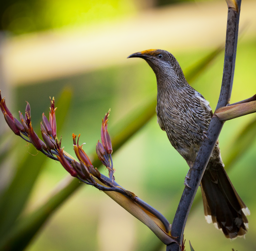

In [17]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0],dest,show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)





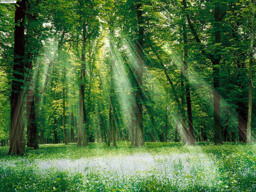

In [18]:
download_url(search_images('forest photos',max_images=1)[0],'forest.jpg',show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [19]:
# a bunch of forest&bird photos saved to different folders , under different lighting condiions for variety.
import os
searches = 'bird','forest'
path = Path('bird_or_not')
from time import sleep
for search in searches:
    dest = path/search
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search_images(f'{search} photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{search} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{search} shade photo'))
    sleep(10)
    resize_images(path/search,max_size=400,dest=path/search)
                    
    
    

In [20]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

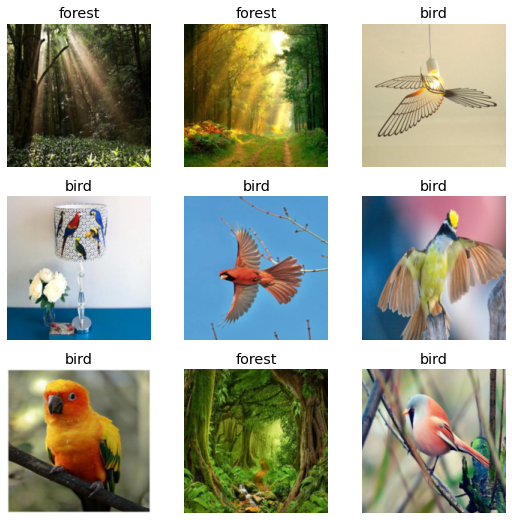

In [21]:
dls=DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,splitter=RandomSplitter(valid_pct=0.2,seed=31),get_y=parent_label,item_tfms=[Resize(192,method='squish')]).dataloaders(path,bs=32)
dls.show_batch()

In [22]:
learn = vision_learner(dls,resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.855920,0.260042,0.062500,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.185005,0.026065,0.000000,00:01
1,0.101189,0.005410,0.000000,00:01
2,0.066038,0.003868,0.000000,00:01


In [23]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


In [24]:
#personal project : Classification of two major temple architectures in India

searches = 'leopard','cheetah'
path=Path('leopard_or_not')
for search in searches:
    dest = path/search
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search_images(f'{search} images'))
    resize_images(path/search,max_size=400,dest=path/search)
    
    





In [25]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

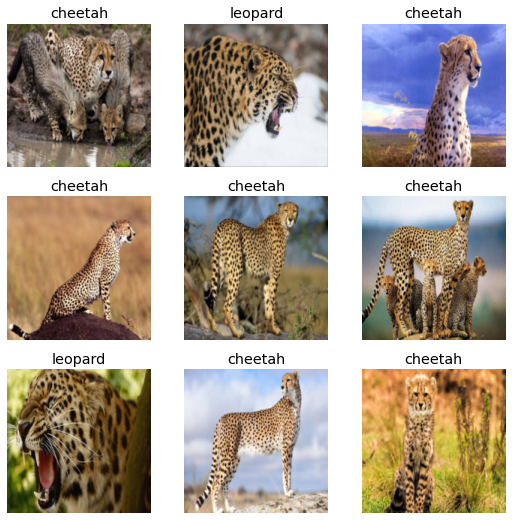

In [26]:
dls=DataBlock(blocks=(ImageBlock,CategoryBlock),get_items=get_image_files,splitter=RandomSplitter(valid_pct=0.2,seed=31),get_y=parent_label,item_tfms=[Resize(192,method='squish')]).dataloaders(path,bs=32)
dls.show_batch()

In [27]:
learn = vision_learner(dls,resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.091451,1.751539,0.363636,00:00


epoch,train_loss,valid_loss,error_rate,time
0,1.196533,1.438789,0.363636,00:00
1,1.081040,1.108109,0.272727,00:00
2,0.848872,0.706317,0.272727,00:00
3,0.634899,0.477706,0.272727,00:00
4,0.544949,0.387829,0.181818,00:00


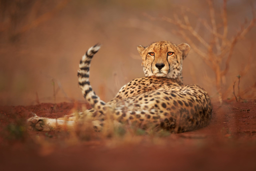

In [28]:
download_url(search_images('cheetah photos',max_images=1)[0],'cheetah.jpg',show_progress=False)
Image.open('cheetah.jpg').to_thumb(256,256)

In [29]:
is_leopard,_,probs = learn.predict(PILImage.create('cheetah.jpg'))
print(f"This is a: {is_leopard}.")
print(f"Probability it's a leopard: {probs[1]:.4f}")

# Good enough classifier able to classify two big cats having confusingly similar appearance

This is a: leopard.
Probability it's a leopard: 0.9858
